# Simple Linear Regression 

## One independent feature and one dependent feature

## Scikitlearn library for ML models

### Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [3]:
dataset = pd.read_csv('Salary_Data.csv')

dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)


In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


### Training the Simple Linear Regression model on the Training set


In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualising the Training set results


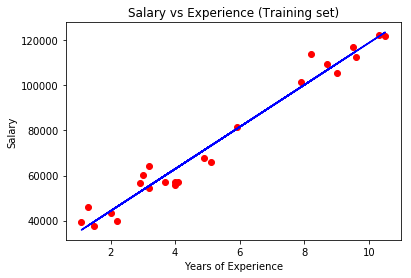

In [8]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Visualising the Test set results


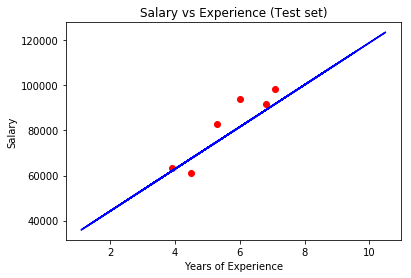

In [9]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Making a single prediction (for example the salary of an employee with 12 years of experience)

In [10]:
print(regressor.predict([[12]]))

[137605.23485427]


#### Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138967,5.

#### Important note: 

Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs.

### Getting the final linear regression equation with the values of the coefficients

### y = bo + b1 * x

In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[9332.94473799]
25609.89799835482


#### Therefore, the equation of our simple linear regression model is:

#### Salary = 9345.94 × YearsExperience + 26816.19



### Predicting the Test set results


In [12]:
y_pred = regressor.predict(X_test)

### Now compare the actual output values for X_test with the predicted values

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df

,Actual,Predicted
0,83088.0,75074.505110
1,98273.0,91873.805638
2,63218.0,62008.382477
3,93940.0,81607.566426
4,61111.0,67608.149319
5,91738.0,89073.922217


### We can also visualize comparison result as a bar graph

#### Note: As the number of records in test set is6, the representation display just 6 records.

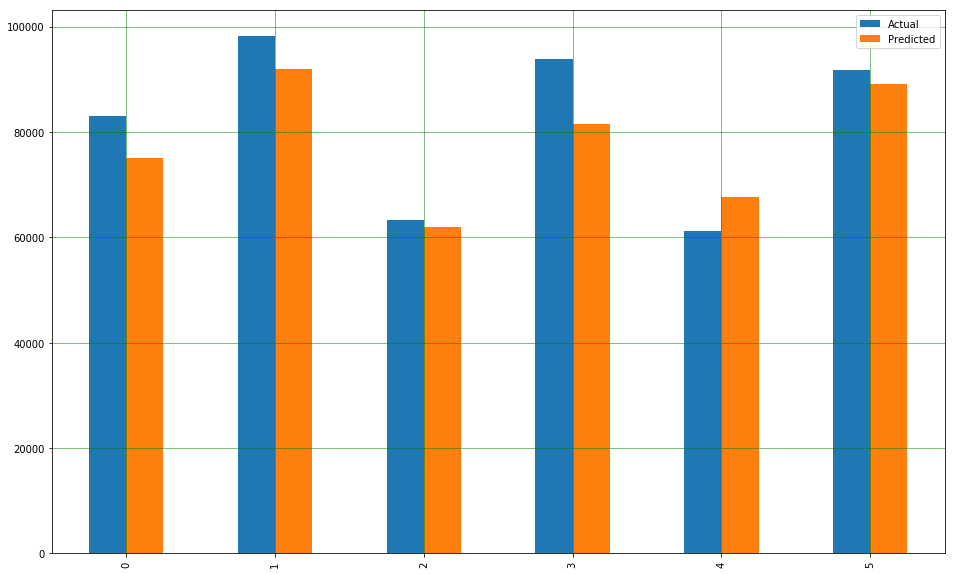

In [14]:
df1 = df.head(15)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Let's find values for the metrics (Mean Absolute Error, Mean Squared Error and Root Mean Squared Error)

In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('')
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6185.994575326634

Mean Squared Error: 51338023.49224842

Root Mean Squared Error: 7165.055721503387

R2 Score: 0.7616681465472094
